1. 데이터를 탐색하고 탐색 결과를 제시하시오.

In [18]:
import pandas as pd

df = pd.read_csv('../data/hotel_bookings.csv')
df.head()

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,NaN,0,0,1,0,131.50
1,0,No Deposit,303.0,2,2,NaN,0,0,0,0,73.95
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,NaN
3,0,No Deposit,48.0,0,1,0.0,0,0,1,0,80.30
4,0,No Deposit,216.0,4,7,0.0,0,0,2,0,60.90


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


종속변수는 is_canceled이며, 대부분의 데이터는 수치형이지만, 하나의 명목형 변수가 존재하기 때문에 인코딩을 통한 변환이 필요해 보임

In [20]:
df.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

3개의 변수에서 결측치가 발견 되었다.

In [27]:
df.is_canceled.value_counts()

0    17600
1     2400
Name: is_canceled, dtype: int64

종속변수는 2가지 클래스로 구성되어 있으며, 대부분이 1 클래스 이므로 오버 샘플링 또는 언더 샘플링 기법을 사용할 필요가 있어보임

In [22]:
df.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
count,20000.00000,19995.000000,20000.000000,20000.000000,19642.000000,20000.000000,20000.000000,20000.000000,20000.000000,18937.000000
mean,0.12000,85.978345,0.892550,2.380400,0.038133,0.032900,0.169050,0.269400,1.983950,101.410239
std,0.32497,96.427240,0.952077,1.777345,0.191521,0.455552,1.502426,0.687566,15.927212,49.245097
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,0.00000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.800000
50%,0.00000,51.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000
75%,0.00000,132.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
max,1.00000,629.000000,13.000000,30.000000,1.000000,26.000000,66.000000,17.000000,379.000000,451.500000


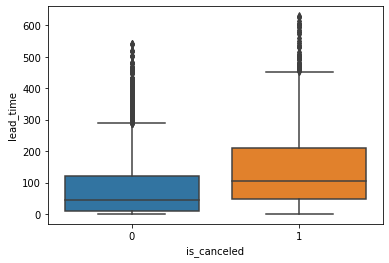

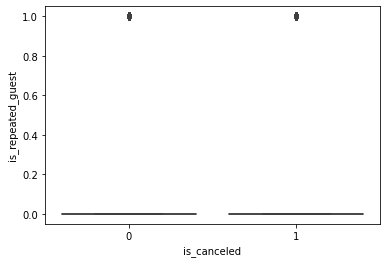

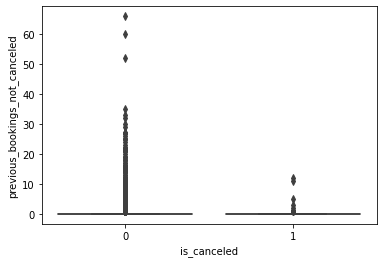

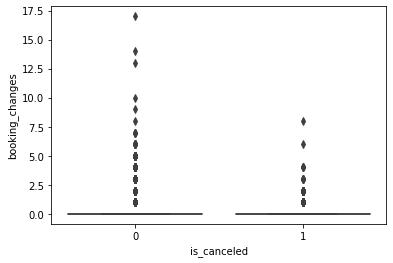

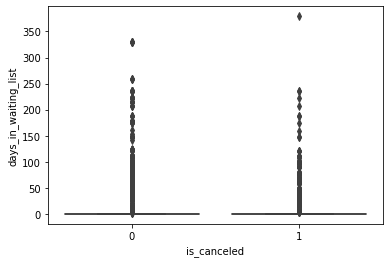

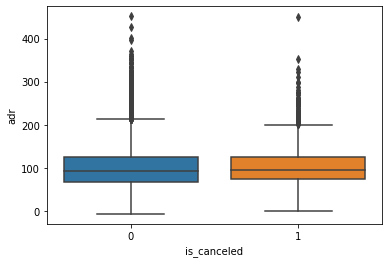

In [28]:
num_col = ['lead_time','is_repeated_guest','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr']
for col in num_col:
    sns.boxplot(x='is_canceled', y=col, data=df)
    plt.show()

In [30]:
df.deposit_type.value_counts()

No Deposit    19138
Non Refund      834
Refundable       28
Name: deposit_type, dtype: int64

deposit_type 변수는 20000개 관측치 중 19171개의 관측치가 No Deposit으로 구성되어 있다.

2. 결측치를 탐색하고 대체 방법 및 근거를 제시하시오.

In [31]:
df.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [32]:
df.isna().sum()/len(df)

is_canceled                       0.00000
deposit_type                      0.00000
lead_time                         0.00025
stays_in_weekend_nights           0.00000
stays_in_week_nights              0.00000
is_repeated_guest                 0.01790
previous_cancellations            0.00000
previous_bookings_not_canceled    0.00000
booking_changes                   0.00000
days_in_waiting_list              0.00000
adr                               0.05315
dtype: float64

결측치가 존재하는 변수는 lead_time, is_repeated_guest, adr이다. lead_time 변수는 1% 미만이므로 결측치가 있는 행을 삭제한다. is_repeated_guest 변수의 결측치는 최빈값으로 대체한다. adr 변수의 결측치는 deposit_type별 평균 adr로 대체한다.

In [36]:
hotel_nonull = df.copy()

#lead_time변수의 결측치 삭제
hotel_nonull.dropna(subset=['lead_time'], axis=0, inplace=True)

# is_repeated_guest변수는 binary이기 때문에 최빈값으로 대체
hotel_nonull['is_repeated_guest'] = hotel_nonull['is_repeated_guest'].fillna(0)

# adr 변수는 연속형 변수이기 때문에 평균 대치법을 사용
# 보증금 유형에 따라 adr이 다르기 때문에 adr 그룹별 평균을 이용해 평균 대체
fill_mean_func = lambda g:g.fillna(g.mean)
hotel_nonull = hotel_nonull.groupby('deposit_type').apply(fill_mean_func)

# hotel_nonull.index = hotel_nonull.index.droplevel(0)
hotel_nonull.sort_index(inplace=True)

hotel_nonull.isna().sum()

is_canceled                       0
deposit_type                      0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
dtype: int64

3. 데이터의 질을 향상시킬 수 있는 방법을 제안하시오.

IQR 방식으로 lead_time 변수의 이상치를 보정해주어 극단적인 값을 제거함으로써 모델의 특정 값이 영향을 주는 경우를 방지한다. 또는 is_repeated_guest 변수에서 1에 해당하는 데이터를 더 수집해 해당 변수의 불균형을 해소한다.

4. 데이터 불균형을 시각화하여 식별하고 불균형 판단 근거를 작성하시오.

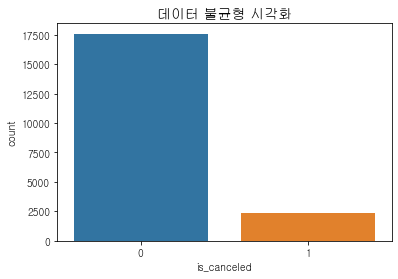

0 비율 :  88.0
1 비율 :  12.0


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = 'C:/Windows/Fonts/NGULIM.TTF'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

sns.countplot(x='is_canceled', data=hotel_nonull)
plt.title('데이터 불균형 시각화', fontsize=14)
plt.show()

ratio0 = round(len(hotel_nonull[hotel_nonull['is_canceled'] == 0]) / len(hotel_nonull)*100,2)
ratio1 = round(len(hotel_nonull[hotel_nonull['is_canceled'] == 1])/ len(hotel_nonull) *100, 2)
print('0 비율 : ',ratio0)
print('1 비율 : ', ratio1)

is_canceled 변수는 0과 1로 구성된 binary 형태의 데이터이다. 0인 데이터와 1인 데이터가 각각 88:12의 비율이므로 0인 데이터가 전체 데이터의 90% 가까이 차지한다. 0인 관측값의 수와 1인 관측값의 수가 균등하지 않기 때문에 해당 데이터는 불균형하다고 판단한다.

5. 오버 샘플링 기법을 설명하고, 비교한 뒤 2개 기법을 선정하고 근거를 제시하시오.

오버 샘플링 기법은 비중이 적은 데이터를 추가로 생성해 늘려 데이터 불균형을 극복하는 방식이다. 소수 레이블을 가진 데이터셋을 다수 레이블을 가진 데이터셋의 수만큼 증식시켜 학습에 충분한 데이터를 확보하는 기법이다. 언더 샘플링은 데이터 손실의 문제로 인해 예측 성능이 저하되는 경향이 있으므로, 일반적으로 불균형한 데이터를 처리하는 방식으로 오버 샘플링을 사용한다.

- 랜덤 오버 샘플링 : 소수 클래스에 속하는 데이터의 관측치를 단순 복사하는 방식으로 데이터를 증식한다. 과적합 발생 가능성이 있지만, 사용방법이 간단하다.
- SMOTE : 적은 데이터셋에 있는 개별 데이터의 k-최근접 이웃을 찾아, 해당 데이터와 k개 이웃들의 차이를 일정한 값으로 만들어 기존 데이터와 약간의 차이를 지닌 새로운 데이터를 생성하는 방식이다. Random Oversampling기법보다 처리 속도가 느리지만, 데이터를 단순하게 동일하게 증식시키는 방식이 아니기 때문에, 과적합 문제를 예방할 수 있다.

6. 기법을 선정한 이유를 작성하고, 원 데이터를 포함해 3개의 데이터셋을 구성하시오.

오버샘플링 방식으로 Random Oversampling과 SMOTE를 선택한다. 그 이유는 RandomOverSampling은 간단하게 데이터 불균형 문제를 해결할 수 있고, SMOTE는 과적합을 방지할 수 있기 때문이다.

In [40]:
hotel_nonull = pd.get_dummies(hotel_nonull)

In [44]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
import time

X = hotel_nonull[hotel_nonull.columns.difference(['is_canceled'])]
y = hotel_nonull['is_canceled']

start = time.time()

ros = RandomOverSampler(random_state=42)
X_ro , y_ro = ros.fit_resample(X,y)
print('time : ', time.time() - start)

time :  4.70258641242981


In [45]:
start = time.time()
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X,y)
print('time', time.time() - start)

time 5.540963172912598


7. 오버샘플링 데이터와 원데이터를 사용해 정확도 측면 모델 하나와 속도 측면의 모델 하나를 선정하고 그 이유를 설명하시오.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

start = time.time()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=100)
clf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print('Train 정확도 : ', clf.score(X_train, y_train))
print(classification_report(y_test, pred))
print("Time : ", time.time() - start)

Train 정확도 :  0.9487996999249813
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3519
           1       0.93      0.44      0.60       480

    accuracy                           0.93      3999
   macro avg       0.93      0.72      0.78      3999
weighted avg       0.93      0.93      0.92      3999

Time :  35.148492097854614


In [50]:
start = time.time()
X_train_ro, X_test_ro, y_train_ro, y_test_ro = train_test_split(X_ro, y_ro, test_size=0.2, stratify=y_ro, random_state=100)
clf_ro = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=100)
clf_ro.fit(X_train_ro, y_train_ro)
pred_ro = clf_ro.predict(X_test_ro)

print('train정확도 : ', clf_ro.score(X_train_ro, y_train_ro))
print(classification_report(y_test_ro, pred_ro))
print('time : ', time.time() - start)

train정확도 :  0.9822392725206024
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      3519
           1       0.94      0.98      0.96      3519

    accuracy                           0.96      7038
   macro avg       0.96      0.96      0.96      7038
weighted avg       0.96      0.96      0.96      7038

time :  64.20275521278381


In [51]:
startstart = time.time()
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, stratify=y_sm, random_state=100)
clf_ro = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=100)
clf_ro.fit(X_train_sm, y_train_sm)
pred_sm = clf_ro.predict(X_test_sm)

print('train정확도 : ', clf_ro.score(X_train_sm, y_train_sm))
print(classification_report(y_test_sm, pred_sm))
print('time : ', time.time() - start)

train정확도 :  0.9801079852230747
              precision    recall  f1-score   support

           0       0.94      0.76      0.84      3519
           1       0.80      0.95      0.87      3519

    accuracy                           0.85      7038
   macro avg       0.87      0.85      0.85      7038
weighted avg       0.87      0.85      0.85      7038

time :  127.07815432548523


정확도 측면에서는 SMOTE를 속도 측면에서는 RandomOverSampling을 선정한다. train, test 데이터셋의 성능이 세가지 데이터셋 가운데 가장 우수하기 때문이다. 속도측면에서는 원본 데이터셋의 모델링 속도가 가장 빠르지만, 이는 원본 데이터가 오버 샘플링 데이터들에 비해 사이즈가 작기 때문이다. 이 점을 감안한다면 RandomOverSampling방식의 수행속도가 SMOTE보다 빠르기 때문에 RandomOverSampling 기법을 선택한다.

8. 원데이터와 오버 샘플링 데이터를 가지고 각각 분류한 결과를 바탕으로, 오버 샘플링이 성능에 미친 영향에 대해 작성하시오.

원본 데이터로 랜덤포레스트 분류 예측을 수행했을 때, train score는 95%의 정확도를 가진다. 오버 샘플링 데이터로 동일한 분류 알고리즘을 수행하면, train score는 98%의 정확도를 가진다. 학습 단계에서는 두 방식 모두 높은 정확도를 보여준다.

하지만, test 데이터로 모델의 최종 성능을 비교해보면 오버 샘플링이 분석 정확도에 긍정적인 영향을 주었다는 것을 알 수 있다. 특히 오버 샘플링은 데이터의 불균형으로 인한 과적합을 방지하고, 예측 모델의 일반화를 가능하게 했다는 점에서 영향을 주었다. 

원본 데이터의 test 데이터로 측정한 모델 성능은 Macro Average가 72%, Weight Average가 90%이다. 이는 train score보다 낮은 수치이므로 데이터 학습 시 불균형 문제로 인해 과적합